###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [ ]:
import pandas as pd
import numpy as np

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [ ]:
clg1=pd.read_csv('college_1.csv')
clg2=pd.read_csv('college_2.csv')

In [ ]:
new=pd.DataFrame()
vals=[clg1,clg2]
for i in vals:
  new= new.append(i, ignore_index=True)
new

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


In [ ]:
new.to_csv('college.csv')

###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


In [ ]:
exceed=new[new['CodeKata Score']>=15000]

In [ ]:
exceed.to_csv('Exceeded_expectations.csv')

###### if  10000<codekata score<15000   (Reached_expectations.csv)



In [ ]:
reach=new[(new['CodeKata Score']<15000) & (new['CodeKata Score']>10000)]

In [ ]:
reach.to_csv('Reached_expectations.csv')

###### if  7000<codekata score<10000   (Needs_Improvement.csv)


In [ ]:
need=new[(new['CodeKata Score']>7000) & (new['CodeKata Score']<10000)]

In [ ]:
need.to_csv('Needs_Improvement.csv')

###### if  codekate score < 7000        (Unsatisfactory.csv)

In [ ]:
unsat=new[new['CodeKata Score']<7000]

In [ ]:
unsat.to_csv('Unsatisfactory.csv')

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [ ]:
new.columns

Index(['Name', 'python', 'mysql', 'Previous Geekions', 'CodeKata Score',
       'Department', 'Rising', 'python_en', 'computational_thinking'],
      dtype='object')

In [ ]:
avg=new.iloc[:,3:5]
avg.mean(axis=0,skipna=False)

Previous Geekions    3842.352941
CodeKata Score       4051.764706
dtype: float64

###### No of students participated 

In [ ]:
new.duplicated().sum()

0

In [ ]:
n=len(new['Name'])
print('Number of students participated : ',n)

Number of students participated :  119


###### #Average completion of python course or my_sql or python english or computational thinking

In [ ]:
#Average completion of python course
maximum=new['python'].max()
completed_stu=len(new[new['python']==maximum])
total_stu=len(new['Name'])
average=(completed_stu/total_stu)*100
average

34.45378151260504

In [ ]:
#Similarly we can calculate for all the courses

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [ ]:
#top 3 performers of week based upon the rise they achieved.

In [ ]:
new[['Name','Rising']].nlargest(3,'Rising')

,Name,Rising
92,shifak N,3140
86,Ganesh Ramkumar R,2000
102,Narasimhan Y L,2000


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [ ]:
new[['Name','Previous Geekions']].nlargest(3,'Previous Geekions')

,Name,Previous Geekions
0,A.Dharani,24500
1,V.JEEVITHA,21740
2,HEMAVATHI.R,19680


###### Department wise codekata performence (pie chart)

In [ ]:
import matplotlib.pyplot as plt
x=list(new['Department'].unique())
averages=[]
new_gb=new.groupby('Department')
for i in x:
  mean=new_gb.get_group(i)['CodeKata Score'].mean()
  averages.append(mean)

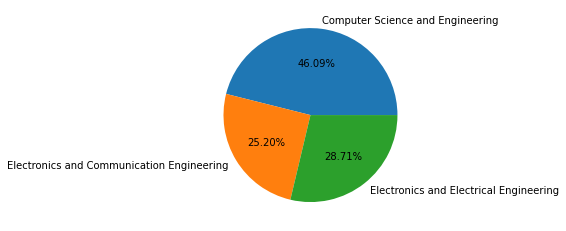

In [ ]:
plt.pie(averages,labels=x,autopct='%1.2f%%');

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [ ]:
#Department-wise highest scores/toppers.
score=[]
new_gb=new.groupby('Department')
for i in x:
  max=new_gb.get_group(i)['CodeKata Score'].max()
  score.append(max)

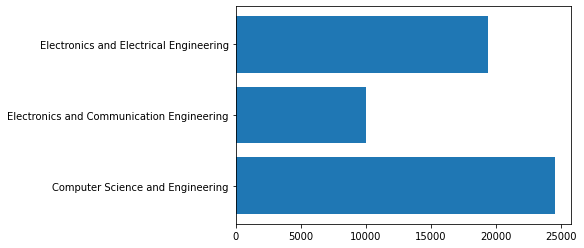

In [ ]:
plt.barh(x,score);